In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
df = pd.read_pickle("GBT_57532_09539_HIP56445_fine/info.pkl")
df = df.set_index("index")
df

,statistic,pvalue,freqs
index,,,
289301080,6219.655813,0.000000e+00,1105.955330
289301180,6234.612421,0.000000e+00,1105.955046
289302380,301.247182,3.845966e-66,1105.951644
289302480,295.603308,6.464831e-65,1105.951360
289460580,1892.986158,0.000000e+00,1105.503067
...,...,...,...
172513356,273.589265,3.898037e-60,1437.107321
172641072,925.144163,1.280848e-201,1436.745181
172641172,901.779106,1.517593e-196,1436.744898


In [21]:
df.sort_index()

,statistic,pvalue,freqs
index,,,
0,1458.939302,0.000000e+00,1926.269531
100,1164.556241,1.317726e-253,1926.269248
200,1242.913410,1.272865e-270,1926.268964
300,1533.651612,0.000000e+00,1926.268681
400,1585.480041,0.000000e+00,1926.268397
...,...,...,...
317505712,3069.314525,0.000000e+00,1025.980999
317506012,249.485305,6.682737e-55,1025.980149
317506112,283.567870,2.654724e-62,1025.979865


In [37]:
df.describe()

,statistic,pvalue,freqs
count,347731.000000,3.477310e+05,347731.000000
mean,1741.487502,2.503382e-43,1400.197519
std,1816.019592,3.526365e-42,189.148057
min,184.208014,0.000000e+00,1025.390648
25%,453.684501,0.000000e+00,1253.251980
50%,863.545447,3.044309e-188,1308.182923
75%,2566.099809,3.045527e-99,1559.883218
max,10490.787847,9.993970e-41,1926.269531


In [39]:
filtered_freqs = df["freqs"]
p_vals = df["pvalue"]

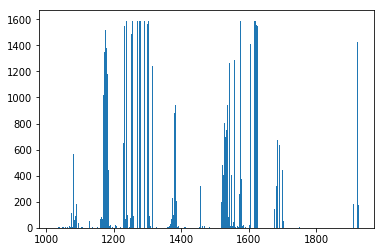

In [48]:
n, bins, patches = plt.hist(filtered_freqs, bins=2000)

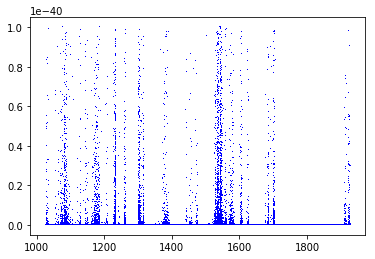

In [49]:
plt.plot(filtered_freqs, p_vals,'b,')